# Comparison of ML accross C++, Numpy, Tensorflow, PyTorchm Scikit-Learn

## Importing libraries

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
import torch
import torchvision

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(torch.__version__)

2.17.0
2.3.1+cu121


## Importing MNIST dataset

Training all the models on the same dataset

In [2]:
fashion_mnist = tf.keras.datasets.mnist
print(type(fashion_mnist))

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

<class 'module'>
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# PyTorch

In [3]:
# imports
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [4]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:03<00:00, 2683231.66it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 50257.08it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 2054348.84it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 38127.29it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [6]:
def train(model, device, train_loader, optimizer, criterion, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.view(data.size(0), -1).to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} '
                  f'({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')

def test(model, device, test_loader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.view(data.size(0), -1).to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} '
          f'({100. * correct / len(test_loader.dataset):.0f}%)\n')


In [7]:
input_size = 28 * 28
hidden_size = 128
output_size = 10
learning_rate = 0.01
epochs = 10

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

model = SimpleNN(input_size, hidden_size, output_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer, criterion, epoch)
    test(model, device, test_loader, criterion)


cuda
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.255603
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.474773
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.933158
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.673608
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.772079
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.546252
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.549979
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.654959
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.510098
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.512222

Test set: Average loss: 0.0061, Accuracy: 8931/10000 (89%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.368386
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.432375
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.321084
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.351494
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.303105
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.333424
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.405188
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.600991
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.337

Prediction: 7, Label: 7


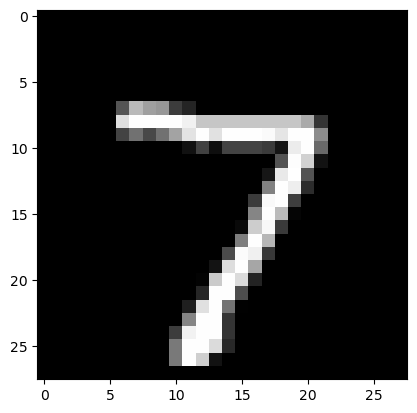

Prediction: 2, Label: 2


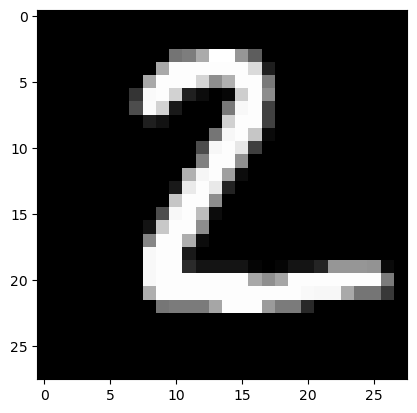

Prediction: 1, Label: 1


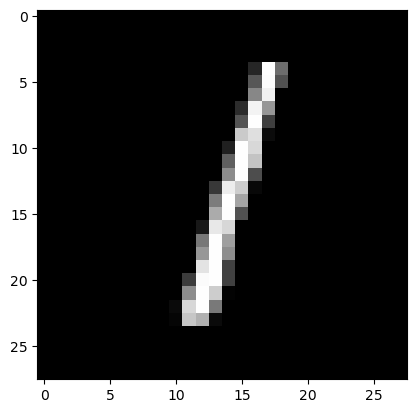

In [9]:
def show_prediction(model, device, data, index):
    model.eval()
    with torch.no_grad():
        data = data[index].view(1, -1).float().to(device)  # Convert data to float and ensure correct shape
        output = model(data)
        pred = output.argmax(dim=1, keepdim=True).item()
        label = test_dataset.targets[index].item()
        image = test_dataset.data[index].numpy()

        print(f'Prediction: {pred}, Label: {label}')
        plt.imshow(image, cmap='gray')
        plt.show()


show_prediction(model, device, test_loader.dataset.data, 0)
show_prediction(model, device, test_loader.dataset.data, 1)
show_prediction(model, device, test_loader.dataset.data, 2)


# TensorFlow


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255.0

In [3]:
# Define the neural network model
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(10, activation='softmax')
])

c:\Programming\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Compile the model
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 882us/step - accuracy: 0.6486 - loss: 1.3456 - val_accuracy: 0.8853 - val_loss: 0.4537
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 808us/step - accuracy: 0.8838 - loss: 0.4437 - val_accuracy: 0.9037 - val_loss: 0.3523
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 819us/step - accuracy: 0.9019 - loss: 0.3564 - val_accuracy: 0.9124 - val_loss: 0.3131
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 825us/step - accuracy: 0.9094 - loss: 0.3268 - val_accuracy: 0.9182 - val_loss: 0.2902
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 834us/step - accuracy: 0.9173 - loss: 0.2955 - val_accuracy: 0.9232 - val_loss: 0.2695
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 846us/step - accuracy: 0.9209 - loss: 0.2805 - val_accuracy: 0.9279 - val_loss: 0.2567
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 811us/step - accuracy: 0.9279 - loss: 0.2593 - val_accuracy: 0.9314 - val_loss: 0.2442
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 837us/step - accuracy: 0.9307 - loss: 0.2490 - 

In [6]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

313/313 - 0s - 525us/step - accuracy: 0.9381 - loss: 0.2151

Test accuracy: 0.9381


In [7]:
# Function to show a prediction
def show_prediction(model, data, index):
    prediction = model.predict(data[index].reshape(1, -1))
    pred_label = prediction.argmax()
    true_label = y_test[index]
    image = x_test[index].reshape(28, 28)

    print(f'Prediction: {pred_label}, Label: {true_label}')
    plt.imshow(image, cmap='gray')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Prediction: 7, Label: 7


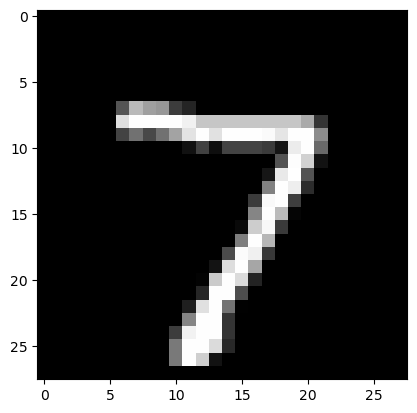

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Prediction: 2, Label: 2


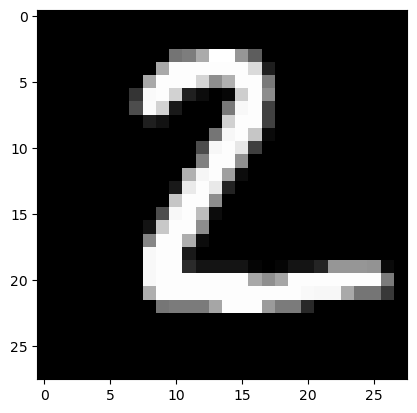

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Prediction: 1, Label: 1


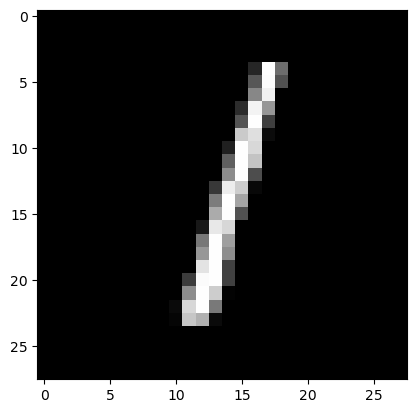

In [8]:
# Show some predictions
show_prediction(model, x_test, 0)
show_prediction(model, x_test, 1)
show_prediction(model, x_test, 2)

# Scikit-Learn

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [10]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784')
X, y = mnist.data / 255.0, mnist.target.astype(int)

In [11]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Define the neural network
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=20, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=42,
                    learning_rate_init=.1)

In [13]:
# Train the neural network
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.27266046
Iteration 2, loss = 0.15681774
Iteration 3, loss = 0.12458148
Iteration 4, loss = 0.10275652
Iteration 5, loss = 0.07932397
Iteration 6, loss = 0.07407820
Iteration 7, loss = 0.05351598
Iteration 8, loss = 0.04677343
Iteration 9, loss = 0.04849973
Iteration 10, loss = 0.05042108
Iteration 11, loss = 0.04912503
Iteration 12, loss = 0.04550420
Iteration 13, loss = 0.04209938
Iteration 14, loss = 0.04246916
Iteration 15, loss = 0.04115442
Iteration 16, loss = 0.04090367
Iteration 17, loss = 0.04788152
Iteration 18, loss = 0.05008243
Iteration 19, loss = 0.04911452
Iteration 20, loss = 0.06009862


c:\Programming\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(128, 64), learning_rate_init=0.1, max_iter=20,
              random_state=42, solver='sgd', verbose=10)

In [14]:
# Evaluate the model
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 95.87%


In [16]:
# Function to show prediction
def show_prediction(model, data, index):
    image = data[index].reshape(28, 28)
    image_expanded = data[index].reshape(1, -1)
    pred = model.predict(image_expanded)[0]
    plt.title(f'Predicted: {pred}')
    plt.imshow(image, cmap='gray')
    plt.show()

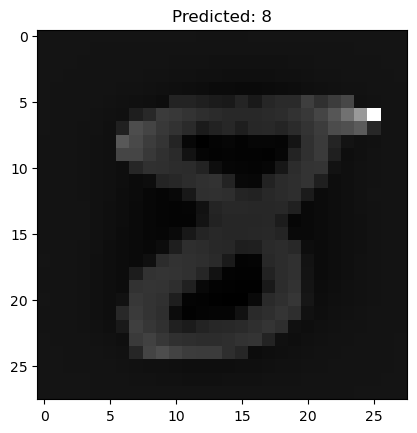

In [17]:
show_prediction(mlp, X_test, 0)

# Custom NN with numpy

In [5]:
import pandas as pd
import numpy as np
import pickle
from keras.datasets import mnist
import matplotlib.pyplot as plt

#from general_functions import *
from general_functions import CustomNN

#import importlib
#import general_functions
#importlib.reload(general_functions)

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
SCALE_FACTOR = 255 # TRES IMPORTANT SINON OVERFLOW SUR EXP
WIDTH = X_train.shape[1]
HEIGHT = X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0],WIDTH*HEIGHT).T / SCALE_FACTOR
X_test = X_test.reshape(X_test.shape[0],WIDTH*HEIGHT).T  / SCALE_FACTOR

In [7]:
W1, b1, W2, b2 = CustomNN.gradient_descent(X_train, Y_train, 0.15, 1000)
with open("trained_params.pkl","wb") as dump_file:
    pickle.dump((W1, b1, W2, b2),dump_file)

Iteration: 100 / 1000
73.228%
Iteration: 200 / 1000
81.685%
Iteration: 300 / 1000
84.870%
Iteration: 400 / 1000
86.515%
Iteration: 500 / 1000
87.638%
Iteration: 600 / 1000
88.510%
Iteration: 700 / 1000
89.077%
Iteration: 800 / 1000
89.537%
Iteration: 900 / 1000
89.937%
Iteration: 1000 / 1000
90.253%


Prediction:  [7]
Label:  7


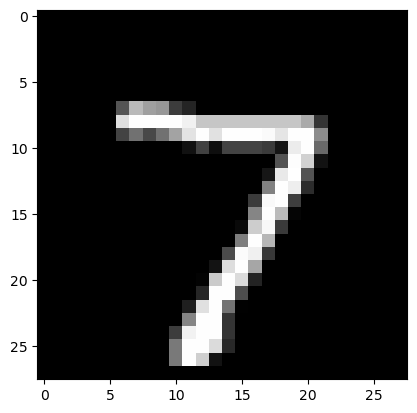

Prediction:  [2]
Label:  2


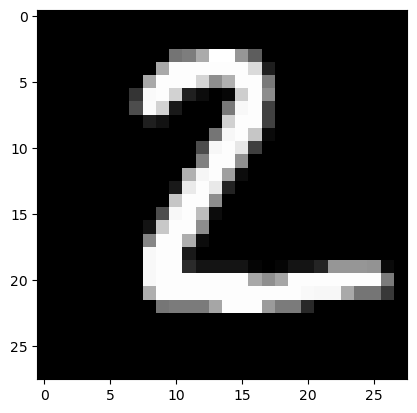

Prediction:  [1]
Label:  1


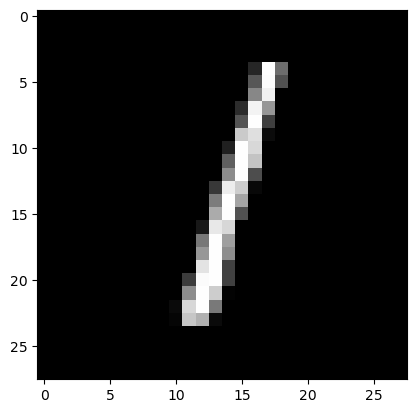

Prediction:  [6]
Label:  6


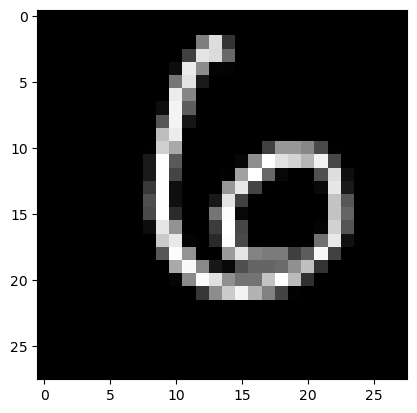

Prediction:  [3]
Label:  3


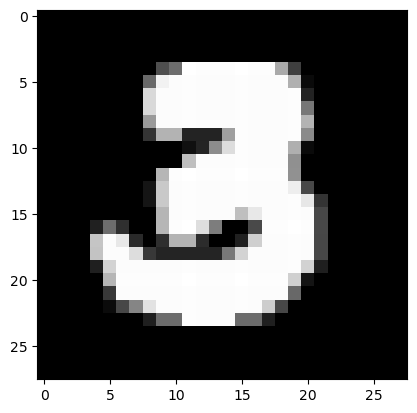

In [6]:
with open("trained_params.pkl","rb") as dump_file:
    W1, b1, W2, b2=pickle.load(dump_file)
CustomNN.show_prediction(0, X_test, Y_test, W1, b1, W2, b2, WIDTH, HEIGHT, SCALE_FACTOR)
CustomNN.show_prediction(1, X_test, Y_test, W1, b1, W2, b2, WIDTH, HEIGHT, SCALE_FACTOR)
CustomNN.show_prediction(2, X_test, Y_test, W1, b1, W2, b2, WIDTH, HEIGHT, SCALE_FACTOR)
CustomNN.show_prediction(100, X_test, Y_test, W1, b1, W2, b2, WIDTH, HEIGHT, SCALE_FACTOR)
CustomNN.show_prediction(200, X_test, Y_test, W1, b1, W2, b2, WIDTH, HEIGHT, SCALE_FACTOR)